In [11]:
if(!require('imputeTS')) {
    install.packages('imputeTS')
    library('imputeTS')
}

In [12]:
if(!require('MGMM')) {
    install.packages('MGMM')
    library('MGMM')
}

Loading required package: MGMM

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘MGMM’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BH’, ‘mvnfast’, ‘plyr’




In [49]:
if(!require('forecast')) {
    install.packages('forecast')
    library('forecast')
}



Loading required package: forecast



In [2]:
var <- 16
filename <- paste0('var_',var,'.csv')
Sample<- read.table(filename,header = TRUE,sep =",");
head(Sample,10)

,x1,x2,x3
,<dbl>,<dbl>,<dbl>
1,2.7812290,2.686543,1.64487306
2,NA,3.975192,-0.16806360
3,4.4757120,4.199912,-1.28191488
4,-3.2390464,-3.693649,0.02367843
5,2.4163149,NA,0.06616650
6,-0.6546143,NA,-1.26124596
7,5.1354886,5.908022,-0.42765712
8,5.4358723,NA,-1.66592186
9,NA,NA,-0.84072236


Посмотрим на графике первый набор данных x1 vs x2

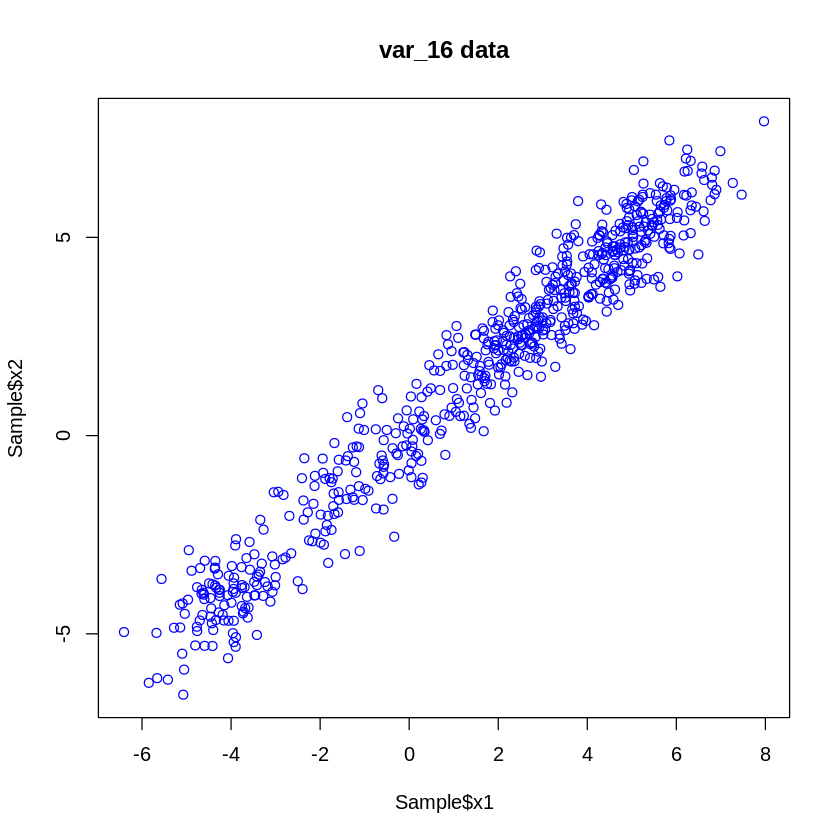

In [8]:
plot(Sample$x1,Sample$x2,col='blue',main = 'var_16 data',pch = 21,type='p')

In [17]:
data <- cbind(Sample$x1,Sample$x2)

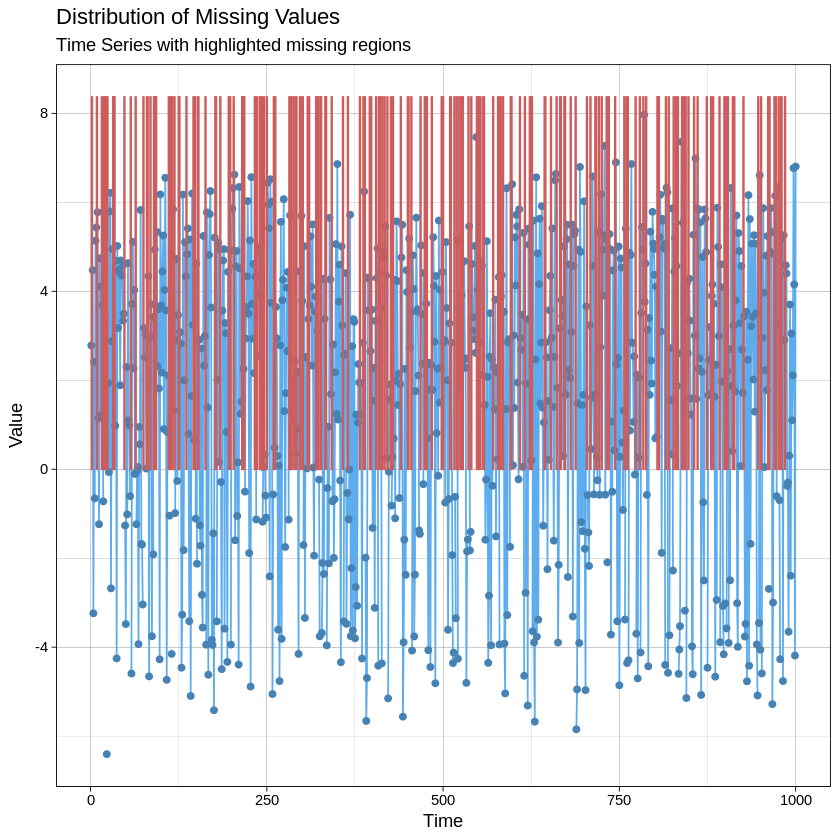

In [14]:
ggplot_na_distribution(Sample$x1)

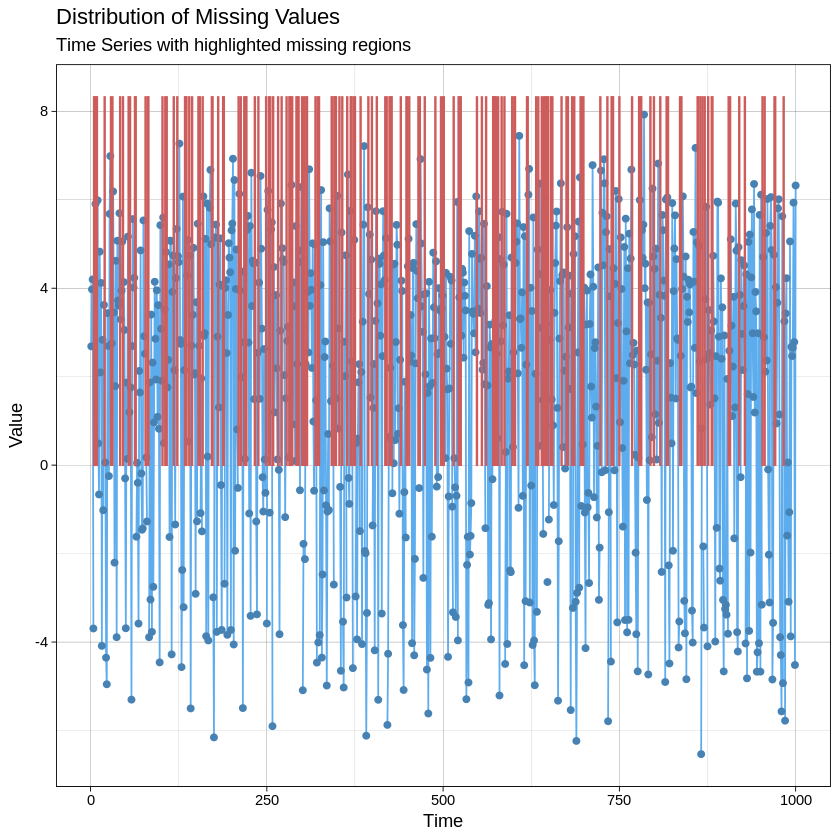

In [15]:
ggplot_na_distribution(Sample$x2)

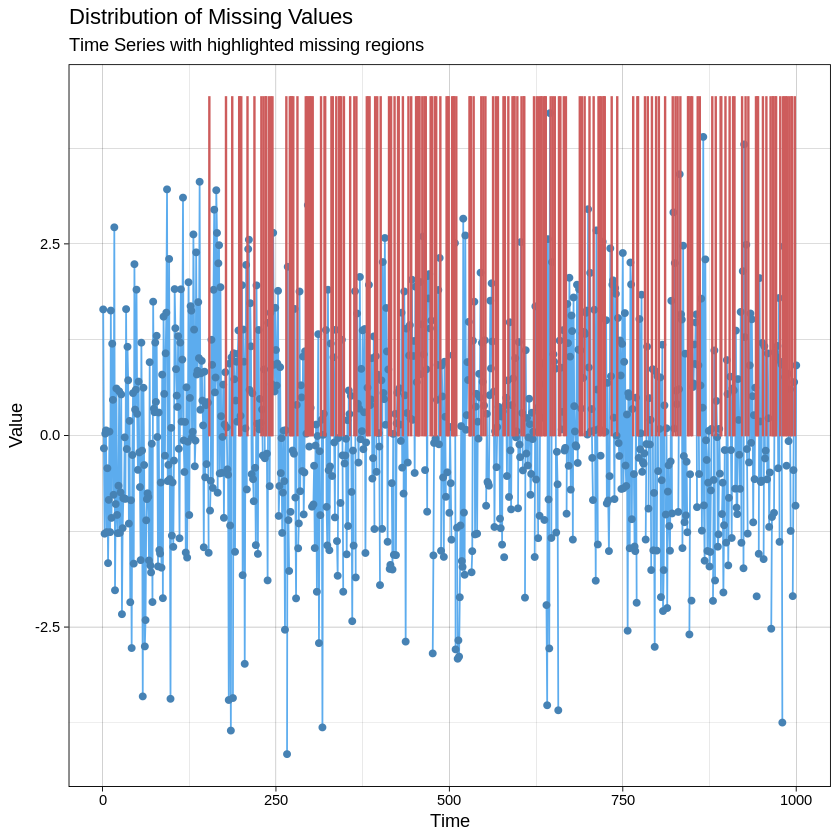

In [16]:
ggplot_na_distribution(Sample$x3)

In [43]:
fit <- FitGMM(data, k = 6, maxit = 100, eps = 1e-8, report = F)
clust_qual = ClustQual(fit)

In [39]:
choose_k <- ChooseK(data, k0 = 2, k1 = 6, boot = 10)

Cluster size 2 complete. 11 fit(s) succeeded.
Cluster size 3 complete. 11 fit(s) succeeded.
Cluster size 4 complete. 11 fit(s) succeeded.
Cluster size 5 complete. 11 fit(s) succeeded.
Cluster size 6 complete. 11 fit(s) succeeded.


In [40]:
choose_k$Choices

Metric,k_opt,Metric_opt,k_1se,Metric_1se
<chr>,<int>,<dbl>,<int>,<dbl>
BIC,6,2374.2990724,6,2374.2990724
CHI,6,31.4539781,6,31.4539781
DBI,2,0.4911363,2,0.4911363
SIL,2,0.6606452,2,0.6606452


In [42]:
(choose_k$Results)

Clusters,Fits,Metric,Mean,SE
<int>,<int>,<chr>,<dbl>,<dbl>
2,11,BIC,3112.5099789,73.69316853
2,11,CHI,6.8017527,0.54283330
2,11,DBI,0.4911363,0.02376224
2,11,SIL,0.6606452,0.00955792
3,11,BIC,3043.1009319,75.35151307
3,11,CHI,11.5548272,0.85772166
3,11,DBI,0.5823905,0.02456787
3,11,SIL,0.5638558,0.01257664
4,11,BIC,2560.4179099,87.24934914


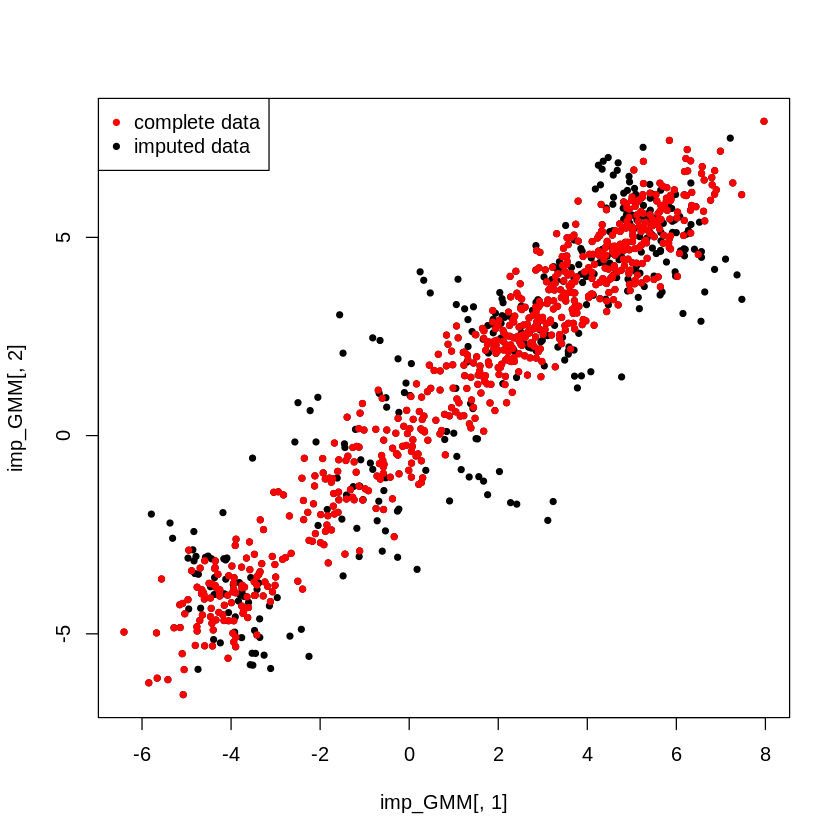

In [44]:
imp_GMM <- GenImputation(fit)
newdata <- cbind(data,imp_GMM)
plot(imp_GMM[,1],imp_GMM[,2],pch = 20,type='p' )
points(data[,1],data[,2],pch=20,col='red')
legend('topleft',c('complete data','imputed data'),col=c('red','black'),pch = 20)

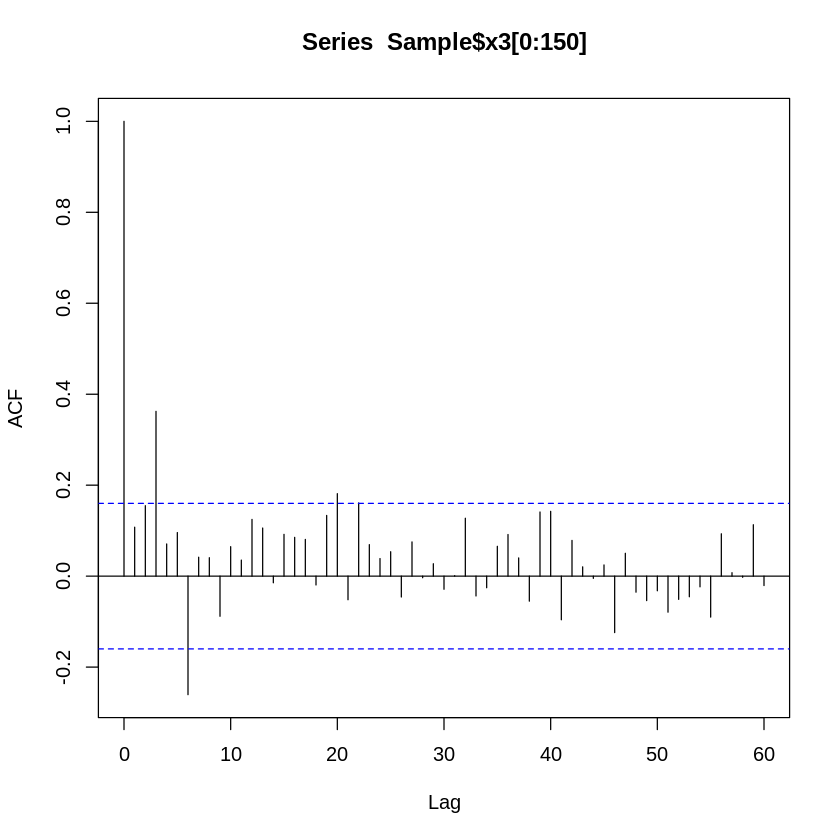

In [47]:
acf(Sample$x3[0:150], lag = 60)

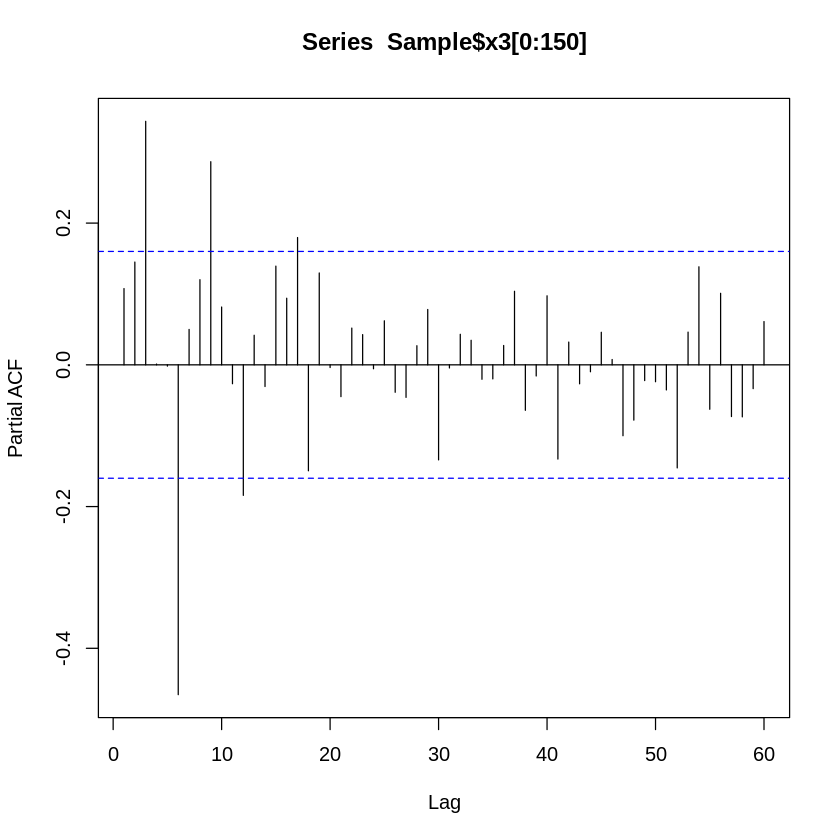

In [48]:
pacf(Sample$x3[0:150], lag = 60)

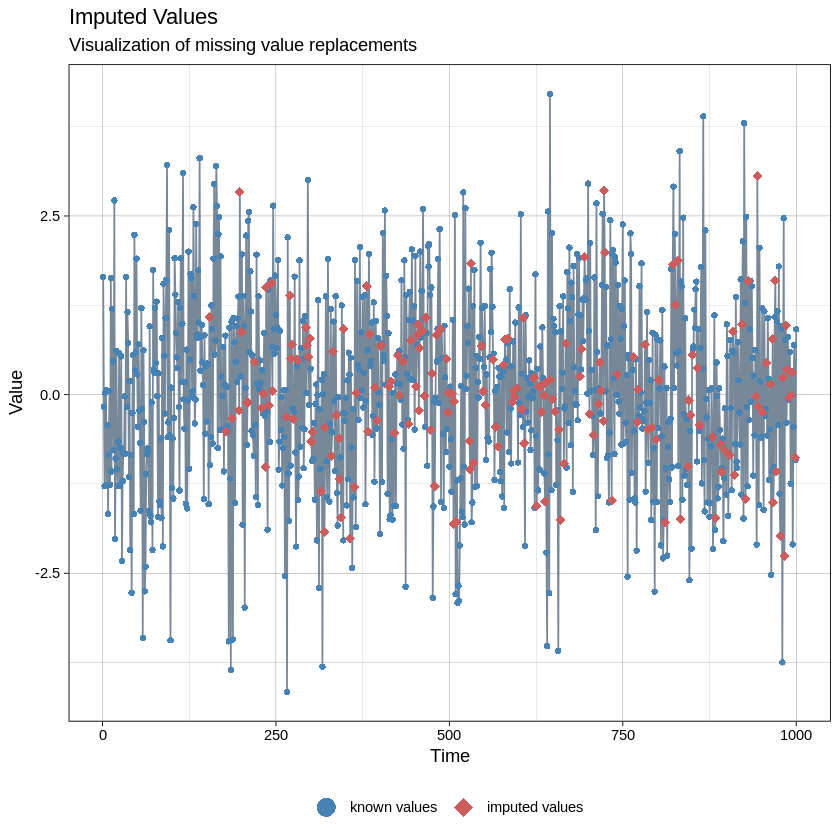

In [50]:
my_model <- auto.arima(Sample$x3, parallel = TRUE, stepwise = FALSE, num.cores = 10, start.p=0, start.q=0, start.P = 0, start.Q = 0)$model
imp_arma <- na_kalman(Sample$x3, model=my_model)
ggplot_na_imputations(Sample$x3, imp_arma)

In [51]:
var <- 16
result <- list(var = var,
               sample1 = imp_GMM,
               sample2 = imp_arma)
saveRDS(result,paste0('result_',var,'.rds'))